### Title
description
intro

Describing Standard imports

## Martin: can look into putting all the importing data into seperate .py file for "reproducability"

In [1]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')


In [2]:
#Reading the file
file = 'fcounty_clean.csv'

df = pd.read_csv(file, header=0, parse_dates=[2,8,9,10,11], infer_datetime_format=True)

In [3]:
#Getting rid of unneccsary columns
df.drop(columns=['Incident Status','Address on Wildland','Mutual Aid Flag','Mutual Aid Flag Description','Inc Mutual Aid','HazMat Released Code','HazMat Released Code Description'], inplace=True)

In [4]:
df.head(3)

,Incident Id,Incident Date,Incident Type Code,Incident Type Code Description,Alarm Date,Arrival Date,Controlled Date,Last Unit Cleared Date,Shift,Alarms,...,Dector Code Description,Mixed Use Code,Mixed Use Code Description,Property Use Code,Propery Use Code Description,Fire Department Name,Fire Department Zip,Incident Location Type,Incident Location Type Description,Incident Location
0,140340,2014-06-18,550,"Public service assistance, other.",2014-06-18 17:41:00,2014-06-18 17:52:00,NaT,2014-06-18 18:32:00,C,0.0,...,NaN,NN,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,6430,1,Street address,"312 WHEELER PARK\nFAIRFIELD, CT 06825"
1,147680,2014-06-06,550,"Public service assistance, other.",2014-06-06 09:13:00,2014-06-06 09:19:00,NaT,2014-06-06 09:38:00,2,0.0,...,NaN,NaN,NaN,961,Highway or divided highway. Includes limited-a...,GREENWICH FIRE DEPARTMENT,6830,1,Street address,"0 RT15N\nGREENWICH, CT 06830"
2,146281,2014-01-08,550,"Public service assistance, other.",2014-01-08 18:58:00,2014-01-08 19:05:00,NaT,2014-01-08 19:19:00,1,0.0,...,NaN,NaN,NaN,419,"1- or 2-family dwelling, detached, manufacture...",GREENWICH FIRE DEPARTMENT,6830,1,Street address,"189 VALLEY RD\nCOS COB, CT 06807\n(41.051311, ..."


## Creating new columns

In [5]:
#Added two columns, Town Population and Incidents vs. Population
incidents = {'FAIRFIELD FIRE DEPT.':8466,'GREENWICH FIRE DEPARTMENT':3387,'NORWALK FIRE DEPT.':4963,'STAMFORD FIRE DEPT.':10011,'WESTPORT FIRE DEPARTMENT':3252,'TOWN OF DARIEN':529, 'NOROTON HEIGHTS FIRE DEPT.': 413, 'NOROTON FIRE DEPT.':286, 'ROWAYTON FIRE DEPT.':17}
Number_of_Incidents = df['Fire Department Name'].map(incidents)
variable = {'FAIRFIELD FIRE DEPT.':62105,'GREENWICH FIRE DEPARTMENT': 62855,'NORWALK FIRE DEPT.': 89005,'STAMFORD FIRE DEPT.':130824,'WESTPORT FIRE DEPARTMENT':28024,'TOWN OF DARIEN':21887,'NOROTON FIRE DEPT.':21887,'ROWAYTON FIRE DEPT.':89005,'NOROTON HEIGHTS FIRE DEPT.':21887}
df['Town Population'] = df['Fire Department Name'].map(variable)
df['Incidents vs. Population'] = Number_of_Incidents/df['Town Population']

In [6]:
#Create new columns as differences in times
#After this point is all my work

import datetime as dt
df['Response Time'] = df['Arrival Date '] - df['Alarm Date ']
df['Response Time'] = df['Response Time']/dt.timedelta(minutes=1)

df['Controlled Time'] = df['Controlled Date'] - df['Arrival Date ']
df['Controlled Time'] = df['Controlled Time']/dt.timedelta(minutes=1)

df['Operation Duration'] = df['Last Unit Cleared Date'] - df['Arrival Date ']
df['Operation Duration'] = df['Operation Duration']/dt.timedelta(minutes=1)



In [7]:
#Changing order of columns, CAN BE ADJUSTED
df = df[['Incident Id', 'Incident Date', 'Incident Type Code',
       'Incident Type Code Description', 'Alarm Date ', 'Arrival Date ',
       'Response Time','Controlled Date','Controlled Time', 'Last Unit Cleared Date','Operation Duration', 'Shift ', 'Alarms',
       'Apparatus Suppression', 'Apparatus EMS', 'Apparatus Other ',
       'Personnel Suppression', 'Personnel EMS', 'Personnel Other',
       'Loss Property  ', 'Loss Other', 'Loss Total', 'Value Property',
       'Value Other', 'Fire Department Fatalities', 'Fatal Other',
       'Fire Department Non Fatal', 'Non Fatal Other', 'Detector Code',
       'Dector Code Description', 'Mixed Use Code',
       'Mixed Use Code Description', 'Property Use Code',
       'Propery Use Code Description', 'Fire Department Name','Town Population', 'Incidents vs. Population',
       'Fire Department Zip', 'Incident Location Type',
       'Incident Location Type Description', 'Incident Location']]

In [9]:
df=df.set_index('Incident Date')

## Start some EDA looking at all of our towns together...

In [ ]:
#Let's return a datframe of the outliers

outliers = ffield_fire[ffield_fire['Operation Duration'] > 400]
outliers.head(3)

Text(0.5, 1.0, 'Number of Incidents')

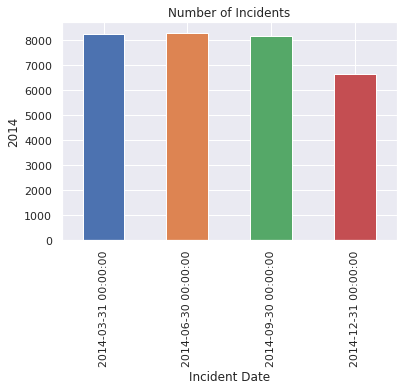

In [10]:
#Number of Incidents per Quarter

ax = df["Incident Id"].resample("Q").count().plot(kind="Bar")
ax.set_ylim(0, None)
ax.set_ylabel("2014")
ax.set_title("Number of Incidents")

#df["Incident Id"].resample("Q").count()

# Martin: perhaps decide what charts to keep and some to trim, to perhaps shorten this a little
## Also, add markdown notes explaining what is happening

Incident Date
2014-01-31    3176
2014-02-28    2429
2014-03-31    2616
2014-04-30    2595
2014-05-31    2890
2014-06-30    2803
2014-07-31    2936
2014-08-31    2419
2014-09-30    2810
2014-10-31    2322
2014-11-30    2201
2014-12-31    2127
Freq: M, Name: Incident Id, dtype: int64

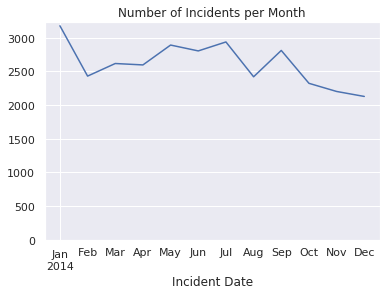

In [11]:
#Number of Incidents per Month

#months =("January","February","March","April","May","June","July","August","September","October","November","December")

ax = df["Incident Id"].resample("M").count().plot()
ax.set_ylim(0, None)
#ax.xticks(np.arange(12), ("January","February","March","April","May","June","July","August","September","October","November","December"))
ax.set_title("Number of Incidents per Month")
df["Incident Id"].resample("M").count()

Text(0.5, 1.0, 'Number of Incidents per Week')

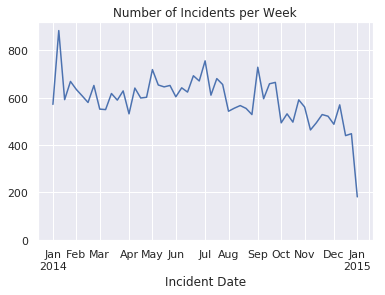

In [12]:
#number of incidents per week
ax = df["Incident Id"].resample("W").count().plot()
ax.set_ylim(0, None)
#ax.set_xticks(np.arange(12), calendar.month_name[1:13])
ax.set_title("Number of Incidents per Week")

Text(0.5, 1.0, 'Number of Incidents per Day')

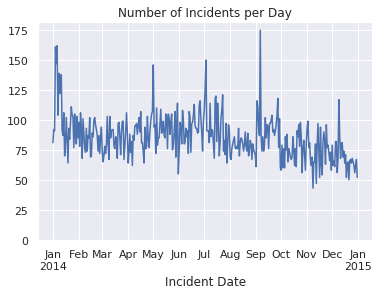

In [43]:
#Number of Incidents per Day
ax = df["Incident Id"].resample("D").count().plot()
ax.set_ylim(0, None)
ax.set_title("Number of Incidents per Day")

In [14]:
#Day with the most fires
np.argmax(df["Incident Id"].resample("D").count())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-09-06 00:00:00', freq='D')

In [15]:
#Day with the least fires
np.argmin(df["Incident Id"].resample("D").count())

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2014-11-08 00:00:00', freq='D')

Incident Date
2014-03-31    20.397392
2014-06-30    21.317364
2014-09-30    22.774990
2014-12-31    24.966714
Freq: Q-DEC, Name: Operation Duration, dtype: float64

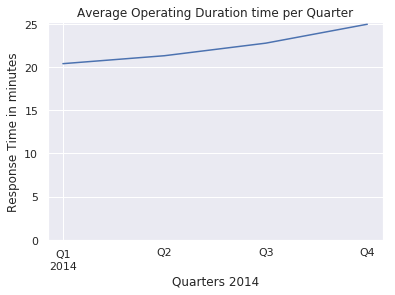

In [16]:
#Average Operating Duration per Quarter
ax1 = df["Operation Duration"].resample("Q").mean().plot()
ax1.set_ylim(0.00, None)
ax1.set_xlabel("Quarters 2014")
ax1.set_ylabel("Response Time in minutes")
ax1.set_title("Average Operating Duration time per Quarter")
df["Operation Duration"].resample("Q").mean()

Incident Date
2014-01-31    22.103437
2014-02-28    19.824946
2014-03-31    18.856689
2014-04-30    21.121408
2014-05-31    20.780497
2014-06-30    22.046251
2014-07-31    27.332856
2014-08-31    19.937418
2014-09-30    20.454714
2014-10-31    20.185286
2014-11-30    21.149497
2014-12-31    34.122772
Freq: M, Name: Operation Duration, dtype: float64

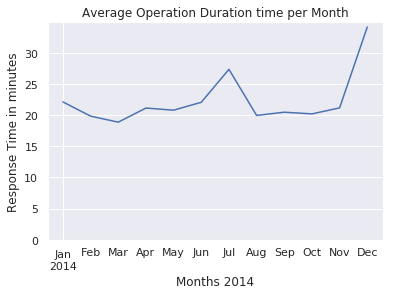

In [17]:
#Average Operating Duration per Month
ax2 = df["Operation Duration"].resample("M").mean().plot()
ax2.set_ylim(0.00, None)
ax2.set_xlabel("Months 2014")
ax2.set_ylabel("Response Time in minutes")
ax2.set_title("Average Operation Duration time per Month")
df["Operation Duration"].resample("M").mean()

In [18]:
#which month had the highest mean Operation Duration
np.argmax(df["Operation Duration"].resample("M").mean())

Timestamp('2014-12-31 00:00:00', freq='M')

In [19]:
#which month had the lowest mean Operation Duration
np.argmin(df["Operation Duration"].resample("M").mean())

Timestamp('2014-03-31 00:00:00', freq='M')

Text(0.5, 1.0, 'Average Operation Duration time per Week')

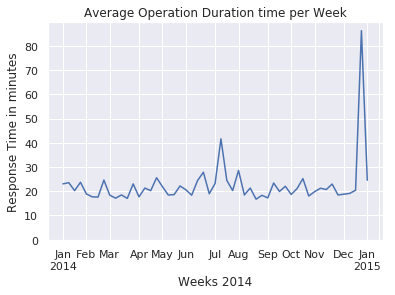

In [20]:
#Average operation duration per week
ax3 = df["Operation Duration"].resample("W").mean().plot()
ax3.set_ylim(0.00, None)
ax3.set_xlabel("Weeks 2014")
ax3.set_ylabel("Response Time in minutes")
ax3.set_title("Average Operation Duration time per Week")

Text(0.5, 1.0, 'Average Operation Duration time per Day')

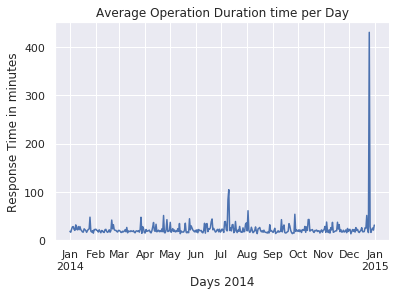

In [21]:
#Average operation duration per day
ax4 = df["Operation Duration"].resample("D").mean().plot()
ax4.set_ylim(0.00, None)
ax4.set_xlabel("Days 2014")
ax4.set_ylabel("Response Time in minutes")
ax4.set_title("Average Operation Duration time per Day")

Text(0.5, 1.0, 'Average Operation Duration rolling 30 day average')

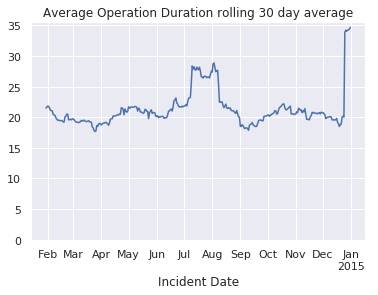

In [22]:
#Average operation duration per day rolling 30 day average
ax2 = df["Operation Duration"].resample("D").mean().rolling(30).mean().plot()
ax2.set_ylim(0, None)
ax2.set_title("Average Operation Duration rolling 30 day average")

In [23]:
#which day had the highest average operaton duration
np.argmax(df["Operation Duration"].resample("D").mean())

Timestamp('2014-12-25 00:00:00', freq='D')

In [24]:
#which day had the highest  operaton duration
np.argmax(df["Operation Duration"])

Timestamp('2014-12-25 00:00:00')

In [25]:
np.argmin(df["Operation Duration"].resample("D").mean())

Timestamp('2014-12-03 00:00:00', freq='D')

## Relook at correlation values- do these make sense?- are the variables chosen good "candinates"

In [26]:
#Correlation between number of incidents and response time
(df["Incident Id"].resample("D").count()).corr(df["Response Time"].resample("D").mean())

0.052199113062042495

In [27]:
#Correlation between number of incidents and operation duration
(df["Incident Id"].resample("D").count()).corr(df["Operation Duration"].resample("D").mean())

0.001395831352146435

In [28]:
#Find the most frequent incident types
df['Incident Type Code'].value_counts()

321     11059
743      1925
745      1353
611      1316
322      1296
735       803
511       791
311       632
553       616
324       540
744       509
733       509
320       480
522       465
412       405
651       375
740       368
622       366
736       346
444       326
746       305
554       297
424       286
113       285
531       259
445       212
300       210
353       196
111       177
6114      174
        ...  
6115        3
210         3
138         3
117         3
540         3
362         3
451         3
356         3
163         3
732         3
357         2
480         2
372         2
713         2
632         2
155         1
223         1
363         1
170         1
815         1
115         1
152         1
364         1
161         1
481         1
133         1
340         1
371         1
211         1
241         1
Name: Incident Type Code, Length: 158, dtype: int64

## Ryan: Explain your analysis process here; what you were trying to do

                                                     Type  Total Amount
Incident Code                                                          
321                                              EMS Call         11059
743                             Smoke Detector Activation          1925
745                     Dispatched and Cancelled en Route          1353
611                  Motor Vehicle Accident with Injuries          1316
322            Alarm System Activation due To Malfunction          1296


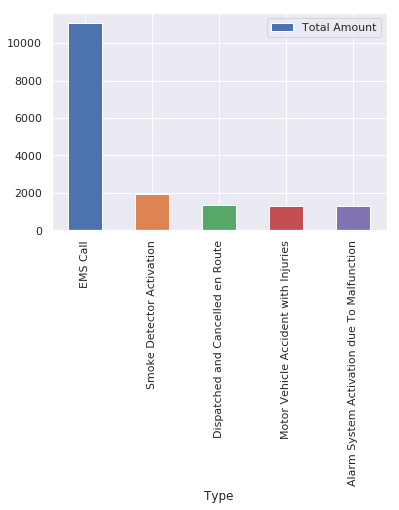

In [29]:
#Created data frame for the five most frequent call types and plotted the results
data = pd.DataFrame([(321,'EMS Call',11059), (743, 'Smoke Detector Activation', 1925),(745,'Dispatched and Cancelled en Route',1353),(611,'Motor Vehicle Accident with Injuries',1316),(322,'Alarm System Activation due To Malfunction',1296)], columns=['Incident Code', 'Type', 'Total Amount'])
indexed_data = data.set_index('Incident Code')
print(indexed_data)
indexed_data.plot(x='Type', y='Total Amount', kind='bar') 

In [30]:
#Created data frame for incident types that had the greatest total loss
df1 = df.groupby('Incident Type Code')['Loss Total'].sum()/df['Loss Total'].sum()*100
df1.sort_values(ascending=False)

Incident Type Code
111    76.650929
445    10.679830
131     7.479825
134     2.387507
132     1.129802
130     0.674684
113     0.289464
114     0.253673
151     0.106585
162     0.102322
116     0.063951
142     0.042826
154     0.040502
118     0.021424
522     0.021317
160     0.021317
138     0.021317
150     0.010680
140     0.001066
251     0.000533
440     0.000426
133     0.000021
413     0.000000
361     0.000000
342     0.000000
350     0.000000
351     0.000000
352     0.000000
353     0.000000
422     0.000000
         ...    
500     0.000000
480     0.000000
651     0.000000
463     0.000000
461     0.000000
460     0.000000
451     0.000000
444     0.000000
443     0.000000
442     0.000000
540     0.000000
541     0.000000
542     0.000000
550     0.000000
650     0.000000
641     0.000000
632     0.000000
631     0.000000
622     0.000000
621     0.000000
611     0.000000
600     0.000000
571     0.000000
561     0.000000
555     0.000000
554     0.000000
553     0.00

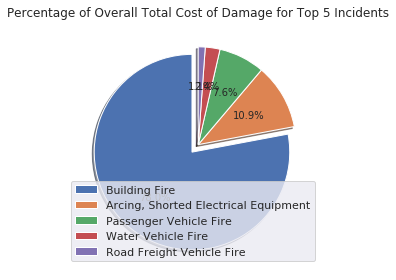

In [31]:
#Pie chart of incident type total loss 
total_percent = [76.67,10.68,7.48,2.39,1.13]
incident_type = ['Building Fire','Arcing, Shorted Electrical Equipment','Passenger Vehicle Fire','Water Vehicle Fire','Road Freight Vehicle Fire']
explode = (0.1,0.0,0.0,0.0,0.0)
plt.pie(total_percent,autopct='%.1f%%', startangle=90, explode=explode, shadow=True)  
plt.title('Percentage of Overall Total Cost of Damage for Top 5 Incidents')
plt.legend(incident_type, loc='lower right')
plt.tight_layout()
plt.show()

## Ryan: can look at distribution of the actual loss values

## is this scatter plot appropriate?

Text(0.5, 1.0, 'Incidents vs. Population')

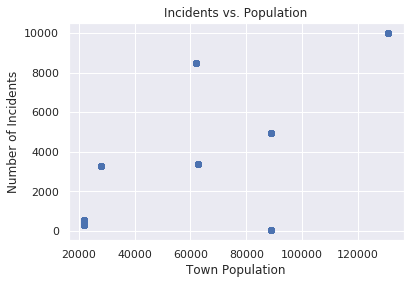

In [32]:
#Scatter plot of incidents and population
plt.scatter(df['Town Population'],Number_of_Incidents)
plt.ylabel('Number of Incidents')
plt.xlabel('Town Population')
plt.title('Incidents vs. Population')

Text(16.125, 0.5, 'Incidents vs. Population')

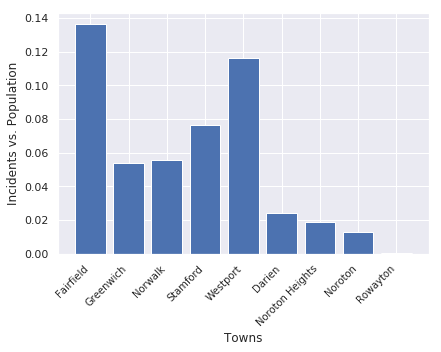

In [33]:
#Graph of incidents vs. population
inc = df['Incidents vs. Population'].drop_duplicates()
fd_name = ['Fairfield', 'Greenwich', 'Norwalk', 'Stamford', 'Westport', 'Darien', 'Noroton Heights', 'Noroton', 'Rowayton']
plt.bar(fd_name,inc)
plt.tight_layout()
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.xlabel('Towns')
plt.ylabel('Incidents vs. Population')

## Kevin: Explain anaylsis process

/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

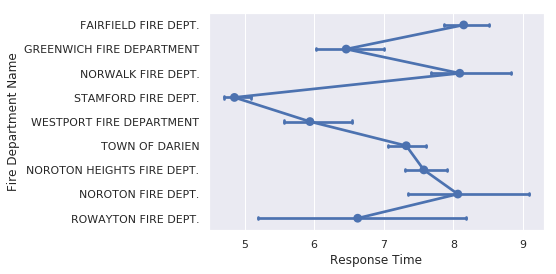

In [34]:
#Mean plot of response times per town

mean_response_time = sns.pointplot(x="Response Time", y="Fire Department Name", data=df, capsize=.1,Title='Response Times per Town')

plt.show

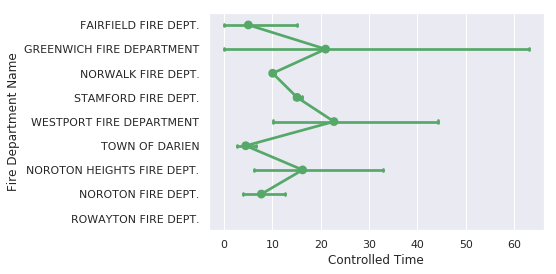

In [35]:
#Mean plot of controlled times per town
mean_control_times = sns.pointplot(x="Controlled Time", y="Fire Department Name", data=df, color ='g',capsize=.1,title='Controlled Time')

plt.show()

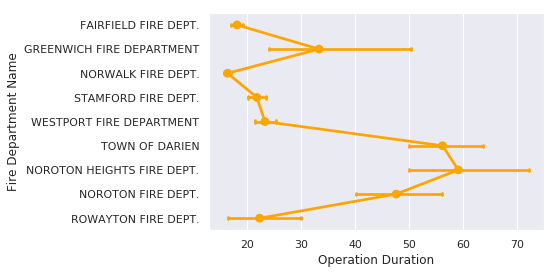

In [36]:
#Mean plot of operation duration times per town
mean_operation_times = sns.pointplot(x="Operation Duration", y="Fire Department Name", color = 'orange',data=df, capsize=.1)

plt.show()

In [37]:
#Look at how long fairfield firefighters put out fires
#Need to make a dataframe of just Fairfield Incidents. 

ffield = df.loc[df['Fire Department Name']=='FAIRFIELD FIRE DEPT.']

#Dataframe of Faifield fire incidents at homes or buildings, using 'Incident Type Code' 111:116
ffield_fire = ffield.loc[ffield['Incident Type Code'].isin([111,112,113,114,115,116])]


ffield_fire.head(3)

,Incident Id,Incident Type Code,Incident Type Code Description,Alarm Date,Arrival Date,Response Time,Controlled Date,Controlled Time,Last Unit Cleared Date,Operation Duration,...,Mixed Use Code Description,Property Use Code,Propery Use Code Description,Fire Department Name,Town Population,Incidents vs. Population,Fire Department Zip,Incident Location Type,Incident Location Type Description,Incident Location
Incident Date,,,,,,,,,,,,,,,,,,,,,
2014-11-12,143722,114,Chimney or flue fire originating in and confin...,2014-11-12 11:34:00,2014-11-12 11:39:00,5.0,NaT,NaN,2014-11-12 12:03:00,24.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"1381 BURR ST\nFAIRFIELD, CT 06824\n(41.191236,..."
2014-01-23,137030,113,Cooking fire involving the contents of a cooki...,2014-01-23 19:41:00,2014-01-23 19:46:00,5.0,NaT,NaN,2014-01-23 19:59:00,13.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"78 BRONSON RD\nFAIRFIELD, CT 06824"
2014-02-15,137556,113,Cooking fire involving the contents of a cooki...,2014-02-15 16:33:00,2014-02-15 16:40:00,7.0,NaT,NaN,2014-02-15 16:53:00,13.0,...,Row of stores. Includes strip malls. Excludes ...,580,"General retail, other.",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"GRASMERE AV\nFairfield, CT 06824"


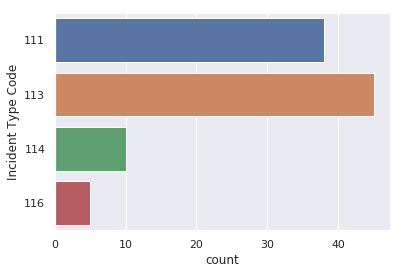

In [38]:
#Let's look at  types of home structure fires that the FAIRFIELD FIRE DEPT. responded to 

sns.countplot(y='Incident Type Code', data=ffield_fire)
plt.show()

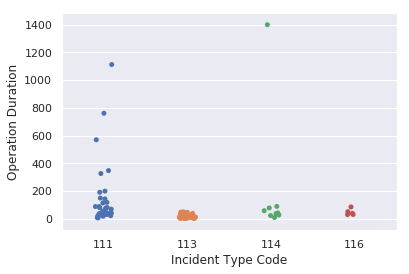

In [39]:
#Let's look at each specific fire type and see how long it took from arrival to last unit cleared date

sns.stripplot(x='Incident Type Code', y='Operation Duration', data = ffield_fire, jitter =True)

plt.show()

In [41]:
#Woah, there are some big outliers, especially in fire code 111. Let's look at those values a little further.
#We'll set the index to incident date to see on what days those happened to research a little more into those incidents.
#Let's return a datframe of the outliers

outliers = ffield_fire[ffield_fire['Operation Duration'] > 400]
outliers.head(3)

,Incident Id,Incident Type Code,Incident Type Code Description,Alarm Date,Arrival Date,Response Time,Controlled Date,Controlled Time,Last Unit Cleared Date,Operation Duration,...,Mixed Use Code Description,Property Use Code,Propery Use Code Description,Fire Department Name,Town Population,Incidents vs. Population,Fire Department Zip,Incident Location Type,Incident Location Type Description,Incident Location
Incident Date,,,,,,,,,,,,,,,,,,,,,
2014-12-22,144699,114,Chimney or flue fire originating in and confin...,2014-12-22 18:34:00,2014-12-22 18:41:00,7.0,NaT,NaN,2014-12-23 18:00:00,1399.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"300 WINNEPOGE DR\nFAIRFIELD, CT 06825\n(41.196..."
2014-07-09,140877,111,Building fire. Excludes confined fires (113â€“...,2014-07-09 23:41:00,2014-07-09 23:41:00,0.0,NaT,NaN,2014-07-10 18:13:00,1112.0,...,Not mixed use. Incident property consists of a...,419,"1- or 2-family dwelling, detached, manufacture...",FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"464 KNAPPS HWY\nFAIRFIELD, CT 06825\n(41.18090..."
2014-03-27,138435,111,Building fire. Excludes confined fires (113â€“...,2014-03-27 11:38:00,2014-03-27 11:41:00,3.0,NaT,NaN,2014-03-27 21:11:00,570.0,...,Row of stores. Includes strip malls. Excludes ...,549,Specialty shop. Sale of materials commonly use...,FAIRFIELD FIRE DEPT.,62105,0.136318,6430,1,Street address,"1555 POST RD\nFairfield, CT 06824\n(41.14106, ..."


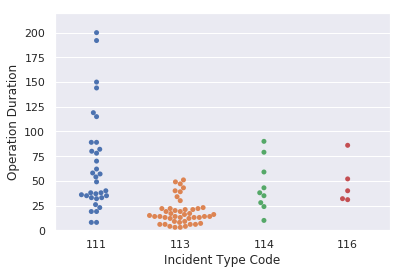

In [42]:
ffield_fire_no_outliers = ffield_fire[ffield_fire['Operation Duration'] < 250]
fig, ax = plt.subplots()

sns.swarmplot(x='Incident Type Code', y='Operation Duration', data = ffield_fire_no_outliers, ax=ax)
ax.set(ylim = (0,220))

plt.show()

# Possible machine learning prediction
## potential: look at response time based on splitting the date, the week, and the time hour of the day, also the number of vehicles responding

# Conclusion "paragraph" to notebook